In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# The shape of the dataset ; rows and columns
diabetes_data.shape

(768, 9)

In [13]:
# Total number of patients who have diabetes; 0 denotes not having it and 1 denotes having it
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# Major moments of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Skewness of the variables in the dataset
diabetes_data_skewness = diabetes_data.skew()
diabetes_data_skewness

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [5]:
# Skewness of the variables in the dataset
diabetes_data_kurtosis = diabetes_data.kurt()
diabetes_data_kurtosis

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [28]:
# Correlation of variables in the diabetes dataset
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
# Correlation Matrix Function

def plot_correlation_matrix(data, save_path=None):
    """
    Plots a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame containing numerical data.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    - None: Displays the heatmap plot.
    """
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Add labels and title with bold font
    plt.title('Correlation Matrix of Diabetes Data', fontweight='bold')
    plt.xlabel('Features', fontweight='bold')
    plt.ylabel('Features', fontweight='bold')

    # Adjust tick size and make them bold
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to correlation_heatmap.png


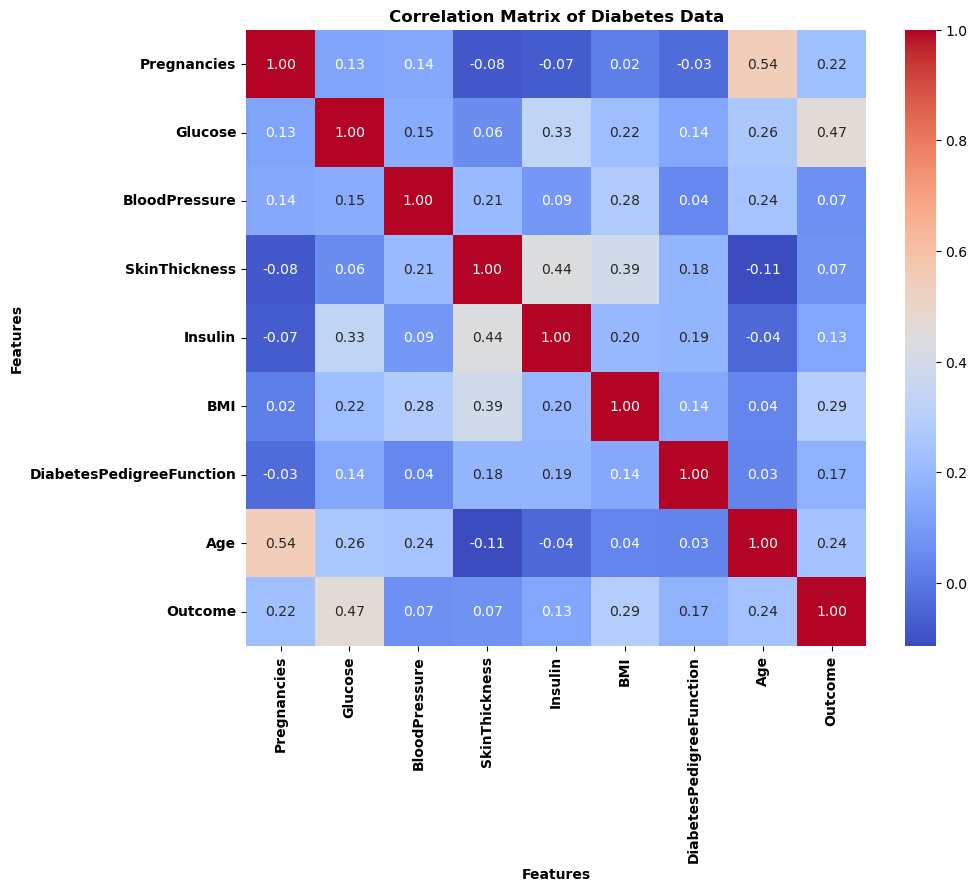

In [12]:
# Plotting correlation matrix of the diabetes data
plot_correlation_matrix(diabetes_data, save_path='correlation_heatmap.png')

In [49]:
diabetes_data.Outcome.mean()

0.3489583333333333

In [50]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:

def plot_relational_graph(data, save_path=None):
    """
    Plots a relational scatter graph showing the relationship between 'Glucose' and 'BMI'.

    Parameters:
    - data (DataFrame): The pandas DataFrame containing the data to plot.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Glucose', y='BMI', data=data, hue='Outcome', style='Outcome', alpha=0.9, s=100, linewidth=1.5)
    plt.title('Relationship between Glucose and BMI', fontweight='bold')  # Make title bold
    plt.xlabel('Glucose', fontweight='bold')  # Make x-axis label bold
    plt.ylabel('BMI', fontweight='bold')  # Make y-axis label bold
    plt.legend(labels=['No Diabetes', 'Diabetes'], prop={'weight':'bold'})  # Make legend text bold
    plt.grid(True)

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to relational_graph.png


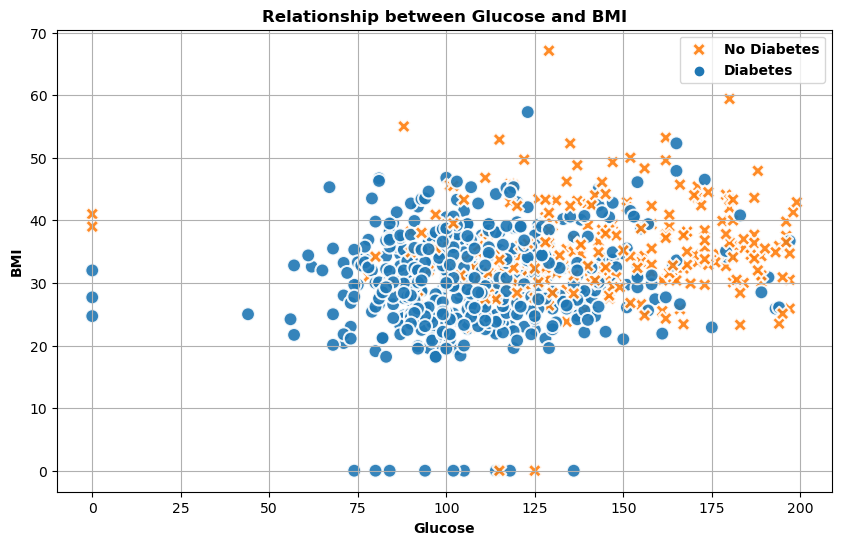

In [77]:
# plotting relational graph
plot_relational_graph(diabetes_data, save_path='relational_graph.png')

In [78]:
def plot_categorical_graph(data, save_path=None):
    """
    Plots a bar chart to visualize the count of patients with and without diabetes.

    Parameters:
    - data (DataFrame): The pandas DataFrame containing the data to plot.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    None
    """
    # Map Outcome values to appropriate labels
    data['Outcome_Label'] = data['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Outcome_Label', data=data, hue='Outcome')
    plt.title('Count of Patients with and without Diabetes', fontweight='bold')  # Make title bold
    plt.xlabel('Outcome', fontweight='bold')  # Make x-axis label bold
    plt.ylabel('Count', fontweight='bold')  # Make y-axis label bold
    plt.grid(axis='y')

    # Set appropriate legend
    plt.legend(labels=['No Diabetes', 'Diabetes'], prop={'weight':'bold'})  # Make legend text bold

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to outcome_value_counts_plot.png


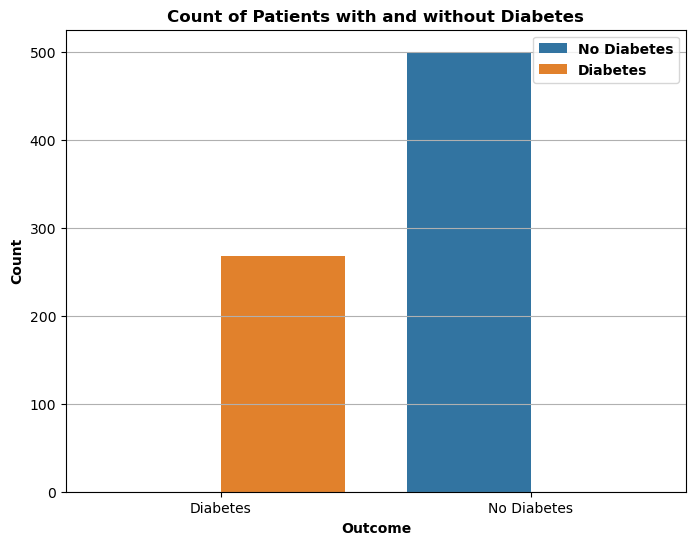

In [79]:
# Plotting categorical graph
plot_categorical_graph(diabetes_data, save_path='outcome_value_counts_plot.png')

In [26]:
# Drop the 'Outcome_Label' column
diabetes_data.drop('Outcome_Label', axis=1, inplace=True)

Plot saved to correlation_heatmap.png


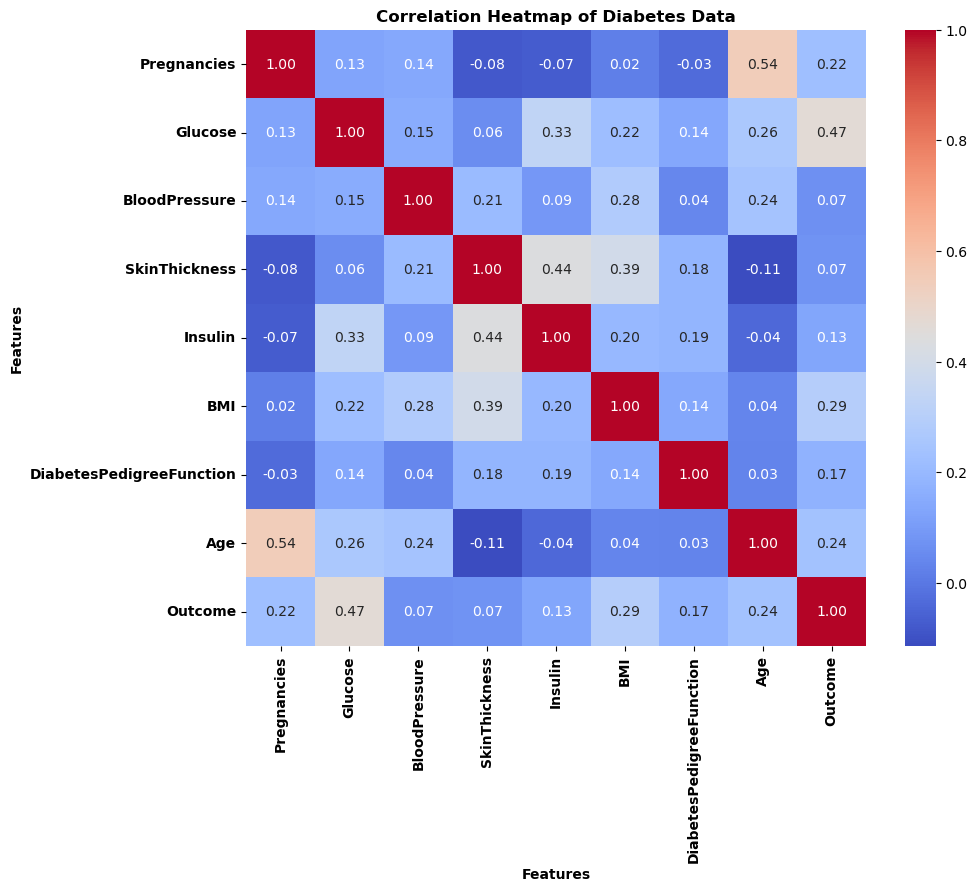

In [60]:
def plot_correlation_heatmap(data, save_path=None):
    """
    Plots a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame containing numerical data.
    - save_path (str, optional): The file path where the plot will be saved. Default is None.

    Returns:
    - None: Displays the heatmap plot.
    """
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Add labels and title with bold font
    plt.title('Correlation Heatmap of Diabetes Data', fontweight='bold')
    plt.xlabel('Features', fontweight='bold')
    plt.ylabel('Features', fontweight='bold')

    # Adjust tick size and make them bold
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

# Example usage:
# Assuming 'diabetes_data' is your DataFrame
plot_correlation_heatmap(diabetes_data, save_path='correlation_heatmap.png')

In [64]:
# diabetes_data

In [42]:
# Defining a function to determine optimal number of clusters

def determine_optimal_clusters(data, k_range):
    """
    Determines the optimal number of clusters using the elbow method and silhouette score.

    Parameters:
    - data (pd.DataFrame): The dataset for clustering, excluding the target variable.
    - k_range (range): The range of k values to test.

    Returns:
    - inertia (list): The list of inertia values for each k in k_range.
    - silhouette_scores (list): The list of silhouette scores for each k in k_range.
    """
    # Drop non-numeric columns
    features = data.drop(['Outcome'], axis=1)

    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    inertia = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

    return inertia, silhouette_scores

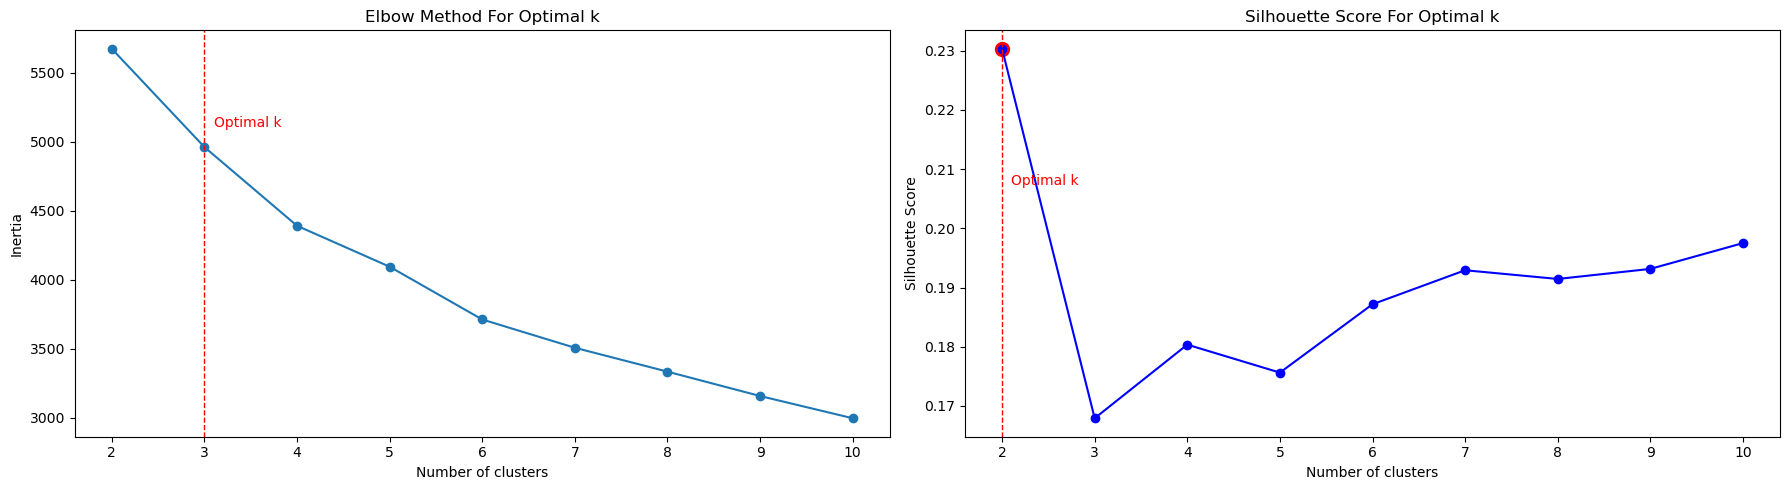

In [44]:
# Determine the optimal number of clusters
k_range = range(2, 11)
inertia, silhouette_scores = determine_optimal_clusters(diabetes_data, k_range)

# Plotting the Elbow method and Silhouette Scores
plt.figure(figsize=(18, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Highlighting the optimal number of clusters suggested by the elbow method
optimal_k = 3  # Change this to the suggested optimal number of clusters
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k + 0.1, max(inertia) - 0.1 * max(inertia), 'Optimal k', color='r')


# Save the Elbow Method plot
plt.savefig('elbow_method_plot.png')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, '-o', color='b')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Highlighting the optimal number of clusters suggested by the silhouette score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
plt.scatter(optimal_k_silhouette, max(silhouette_scores), color='r', s=100)
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k_silhouette + 0.1, max(silhouette_scores) - 0.1 * max(silhouette_scores), 'Optimal k', color='r')

plt.tight_layout()
plt.show()

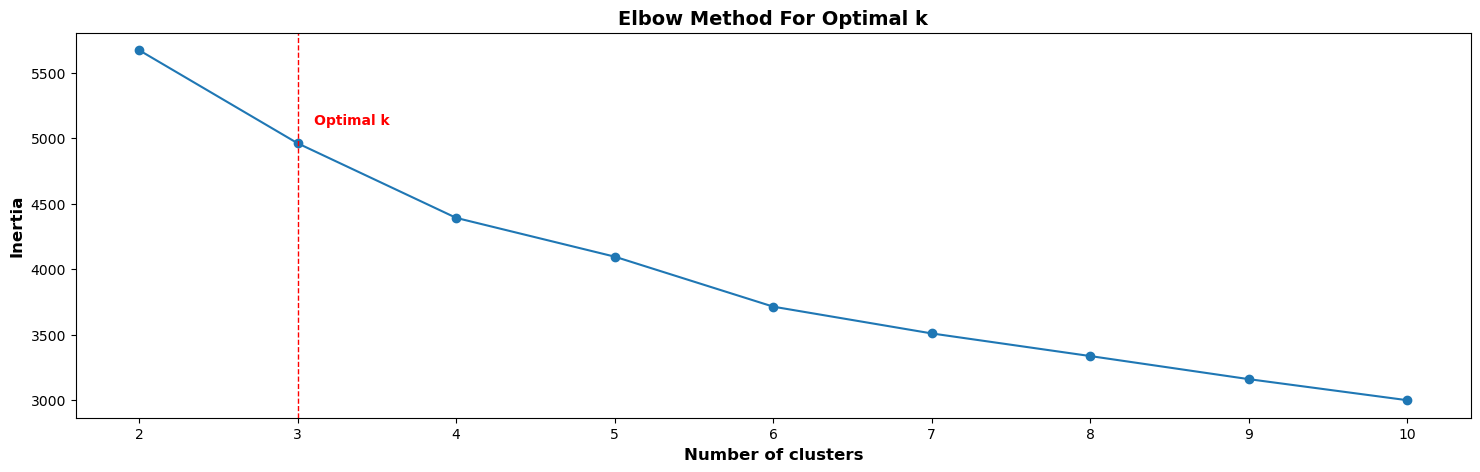

In [52]:
# Determine the optimal number of clusters
k_range = range(2, 11)
inertia, silhouette_scores = determine_optimal_clusters(diabetes_data, k_range)

# Plotting the Elbow method and Silhouette Scores
plt.figure(figsize=(18, 5))

# Elbow Method Plot
plt.plot(k_range, inertia, '-o')
plt.title('Elbow Method For Optimal k', fontweight='bold', fontsize=14)
plt.xlabel('Number of clusters', fontweight='bold', fontsize=12)
plt.ylabel('Inertia', fontweight='bold', fontsize=12)

# Highlighting the optimal number of clusters suggested by the elbow method
optimal_k = 3  # Change this to the suggested optimal number of clusters
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k + 0.1, max(inertia) - 0.1 * max(inertia), 'Optimal k', color='r', fontweight='bold')

# Save the Elbow Method plot
plt.savefig('elbow_method_plot.png')

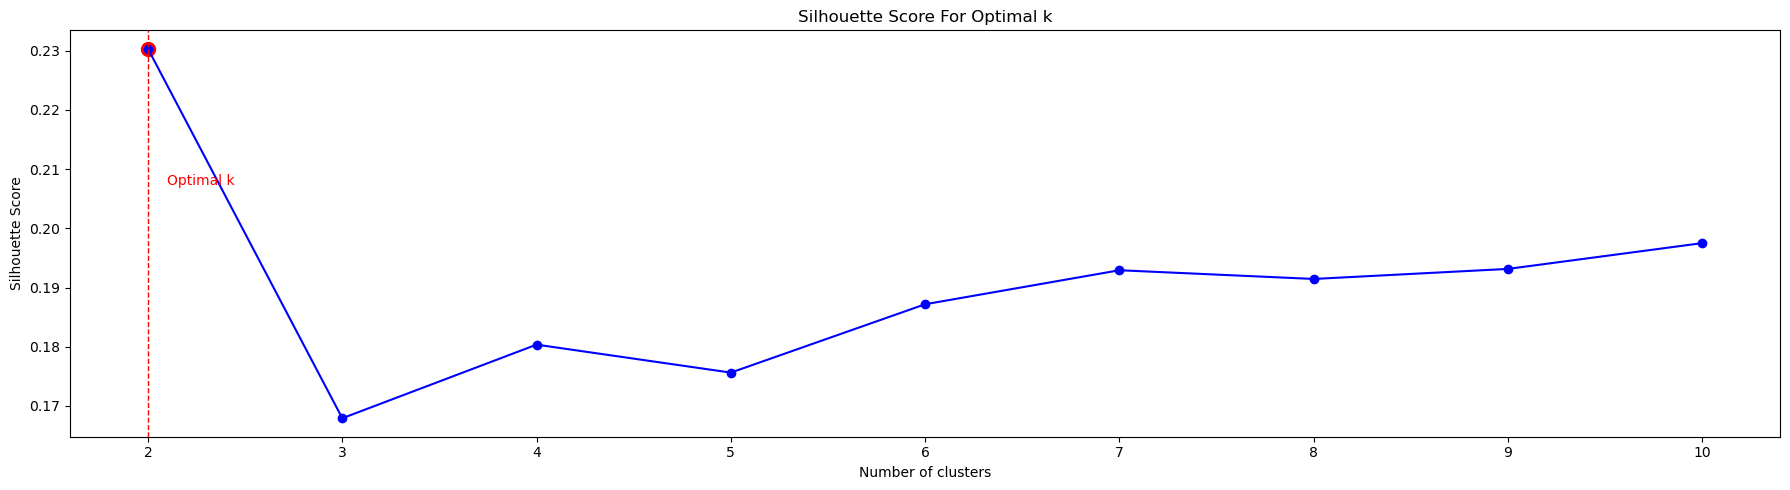

In [49]:
# Silhouette Score Plot
plt.figure(figsize=(18, 5))
plt.plot(k_range, silhouette_scores, '-o', color='b')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Highlighting the optimal number of clusters suggested by the silhouette score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
plt.scatter(optimal_k_silhouette, max(silhouette_scores), color='r', s=100)
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k_silhouette + 0.1, max(silhouette_scores) - 0.1 * max(silhouette_scores), 'Optimal k', color='r')

plt.tight_layout()
plt.show()

In [54]:
# Clustering Function

def perform_kmeans_clustering(data, n_clusters):
    """
    Performs K-Means clustering on the given data.
    
    Parameters:
    - data (pd.DataFrame): The dataset for clustering.
    - n_clusters (int): The number of clusters to form.
    
    Returns:
    - clusters (numpy.ndarray): The cluster labels for each data point.
    - centers_original_space (numpy.ndarray): The cluster centers in the original feature space.
    """
    # Extract features for clustering
    features = data[['Glucose', 'BMI']]
    
    # Scale the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    
    # Get cluster labels and cluster centers
    clusters = kmeans.labels_
    centers_original_space = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return clusters, centers_original_space

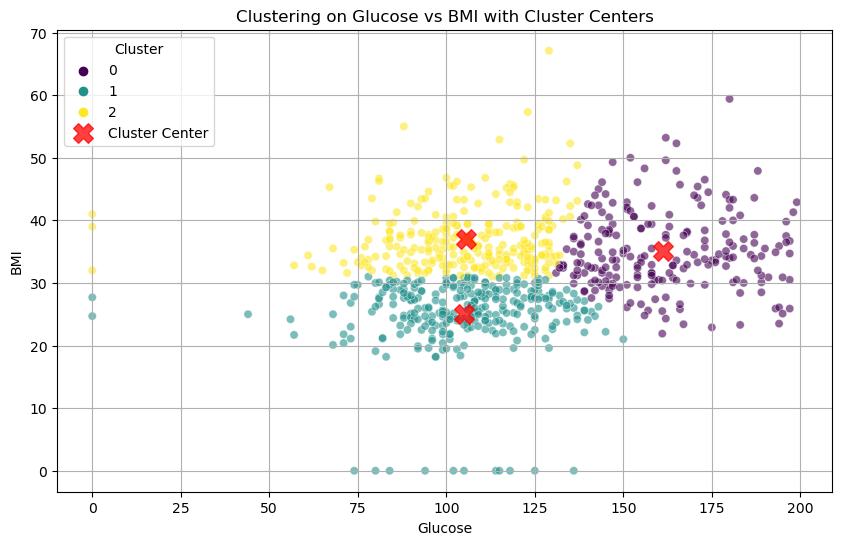

In [55]:
# Performing K-Means clustering with the optimal number of clusters
optimal_k = 3  

# Calling the clustering function
clusters, centers_original_space = perform_kmeans_clustering(diabetes_data, n_clusters=optimal_k)

# Adding cluster assignments to the original dataset for visualization
diabetes_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Cluster', data=diabetes_data, palette='viridis', alpha=0.6, legend='full')
plt.scatter(centers_original_space[:, 0], centers_original_space[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Center')
plt.title('Clustering on Glucose vs BMI with Cluster Centers')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

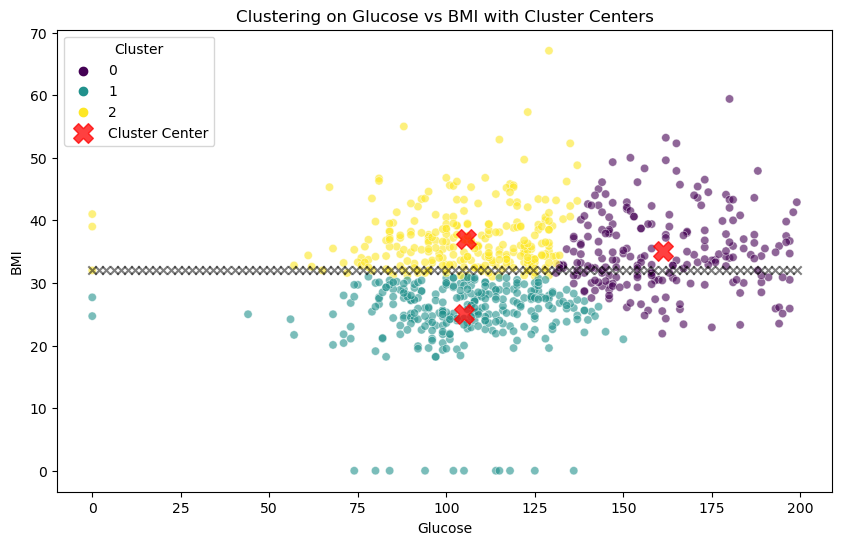

In [31]:
def predict_with_cluster_groups(X, kmeans_model, num_samples=100):
    """
    Generates predicted points and assigns them to appropriate clusters based on the trained KMeans model.
    
    Parameters:
    - X (array-like): The independent variable.
    - kmeans_model (KMeans): The trained KMeans model.
    - num_samples (int): Number of samples to generate for prediction.
    
    Returns:
    - predicted_clusters (array-like): The cluster assignments for the predicted points.
    """
    # Generate predicted points
    x_pred = np.linspace(X.min(), X.max(), num_samples).reshape(-1, 1)
    # Dummy BMI values at mean BMI
    bmi_mean = np.mean(diabetes_data['BMI'])
    bmi_dummy = np.full_like(x_pred, bmi_mean)
    # Concatenate Glucose and dummy BMI
    X_pred = np.concatenate((x_pred, bmi_dummy), axis=1)
    # Predict cluster assignments for the generated points
    predicted_clusters = kmeans_model.predict(X_pred)
    
    return x_pred, predicted_clusters

# Load your dataset (assuming it's named diabetes_data)

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 3  # Change this to the optimal number of clusters you determined
clusters, centers_original_space = perform_kmeans_clustering(diabetes_data, n_clusters=optimal_k)

# Adding cluster assignments to the original dataset for visualization
diabetes_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Cluster', data=diabetes_data, palette='viridis', alpha=0.6, legend='full')
plt.scatter(centers_original_space[:, 0], centers_original_space[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Center')
plt.title('Clustering on Glucose vs BMI with Cluster Centers')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Cluster')

# Fit KMeans model with original data
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(diabetes_data[['Glucose', 'BMI']])

# Perform clustering prediction and plot the predicted points with assigned clusters
x_pred, predicted_clusters = predict_with_cluster_groups(diabetes_data['Glucose'].values.reshape(-1, 1), kmeans_model=kmeans_model)
for cluster in range(optimal_k):
    plt.scatter(x_pred[predicted_clusters == cluster], [diabetes_data['BMI'].mean()] * np.sum(predicted_clusters == cluster), marker='x', color='black', alpha=0.5, label=f'Predicted Cluster {cluster}')

plt.show()

In [70]:
# Fitting Function

def plot_linear_fit_with_confidence_and_error_bars(X, y):
    """
    Fits a linear model to X and y, then plots the data, the fitted line,
    the confidence interval around the fitted line, and error bars representing
    the residuals of the fit.
    """
    # Fit the model
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Make predictions
    x_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = intercept + slope * x_pred
    
    # Calculate the residuals
    residuals = y - (slope * X + intercept)
    
    # Calculate the 95% confidence interval for the residuals
    ci = 1.96 * np.std(residuals)  # 95% confidence interval
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data', alpha=0.5)
    plt.plot(x_pred, y_pred, label='Linear fit', color='red', linewidth=2.5)  # Increased linewidth for the fitted line
    plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color='red', alpha=0.2, label='95% Confidence Interval')
    plt.errorbar(X, y, yerr=np.abs(residuals), fmt='o', color='blue', alpha=0.1, label='Error Bars', linewidth=0.5)  
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title('Linear Fit with Confidence Interval and Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()

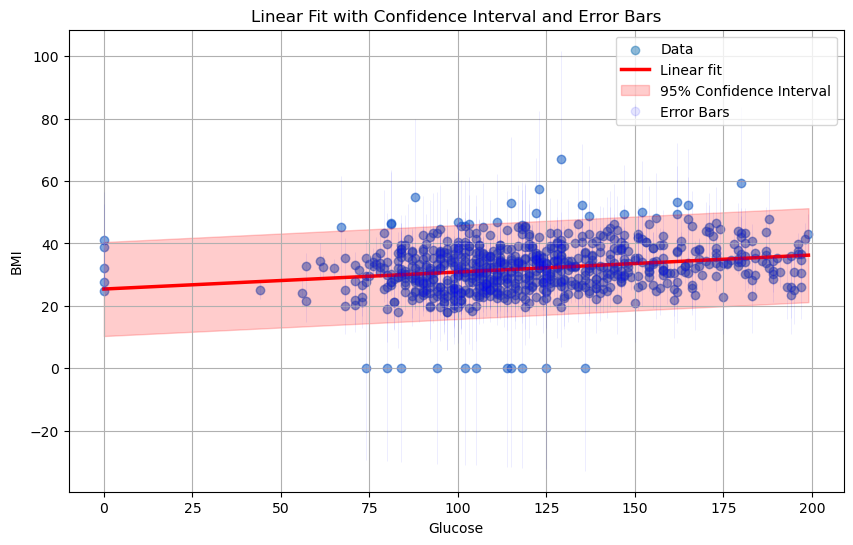

In [71]:
# Convert to numpy arrays for compatibility
X = diabetes_data['Glucose'].to_numpy()
y = diabetes_data['BMI'].to_numpy()

# Performing the fitting and plotting operation
plot_linear_fit_with_confidence_and_error_bars(X, y)

In [72]:
# Function for new data prediction

def plot_linear_fit_with_predictions(X, y, new_glucose_levels, alpha=0.1):
    """
    Fits a linear model to X and y, then plots the data, fitted line, predictions for new glucose levels with uncertainties,
    and the confidence intervals around the fitted line.
    
    Parameters:
        X (array-like): The independent variable.
        y (array-like): The dependent variable.
        new_glucose_levels (array-like): New glucose levels for prediction.
        alpha (float): Transparency level of predicted lines.
    """
    # Fit linear model
    slope, intercept, _, _, std_err = stats.linregress(X, y)
    
    # Predict for original data
    x_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = intercept + slope * x_pred
    
    # Predict for new glucose levels
    new_bmi_predictions = intercept + slope * new_glucose_levels
    
    # Calculate confidence margin for new predictions
    new_conf_margin = std_err * np.sqrt(1/len(X) + (new_glucose_levels - np.mean(X))**2 / np.sum((X - np.mean(X))**2))
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Original Data')
    plt.plot(x_pred, y_pred, color='red', label='Fitted Line')
    plt.errorbar(new_glucose_levels, new_bmi_predictions, yerr=new_conf_margin, fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=0, label='Predictions with Uncertainty')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title('BMI Predictions from New Glucose Levels with Uncertainty')
    plt.legend()
    plt.show()

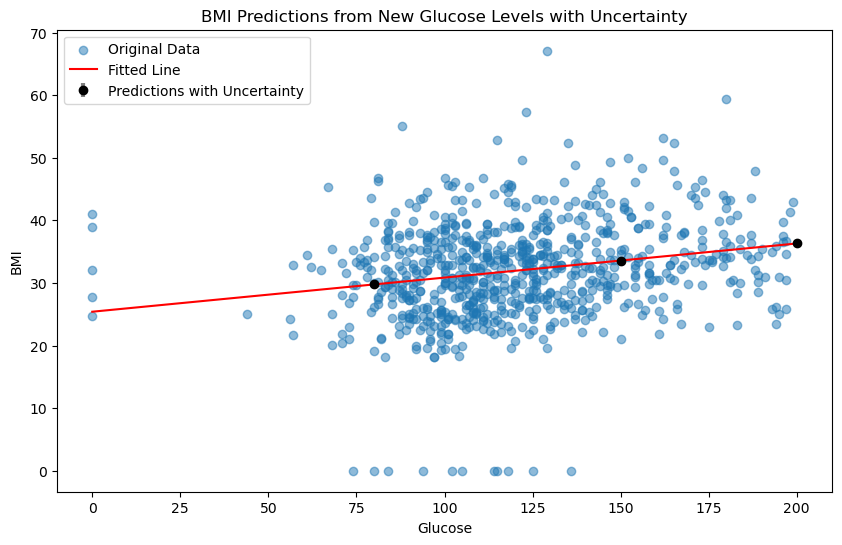

In [73]:
# Convert to numpy arrays for compatibility
X = diabetes_data['Glucose'].to_numpy()
y = diabetes_data['BMI'].to_numpy()

# New glucose levels for prediction
new_glucose_levels = np.array([80, 150, 200])

# Perform the corrected fitting and plotting operation
plot_linear_fit_with_predictions(X, y, new_glucose_levels)